<a href="https://colab.research.google.com/github/IrsyadNurH/UTSPrakML/blob/main/1227050061_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [83]:
# Mengimpor dataset
data = pd.read_csv('dataset_buys _comp.csv')

df = pd.DataFrame(data)

print(data.head())


          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1


In [84]:
# Mengonversi data kategorikal ke numerik dan memisahkan fitur serta label
df = pd.get_dummies(df, columns=["Age", "Income", "Student", "Credit_Rating"], drop_first=True)
X = df.drop("Buys_Computer", axis=1)  # Mengambil fitur
y = df["Buys_Computer"]  # Label

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

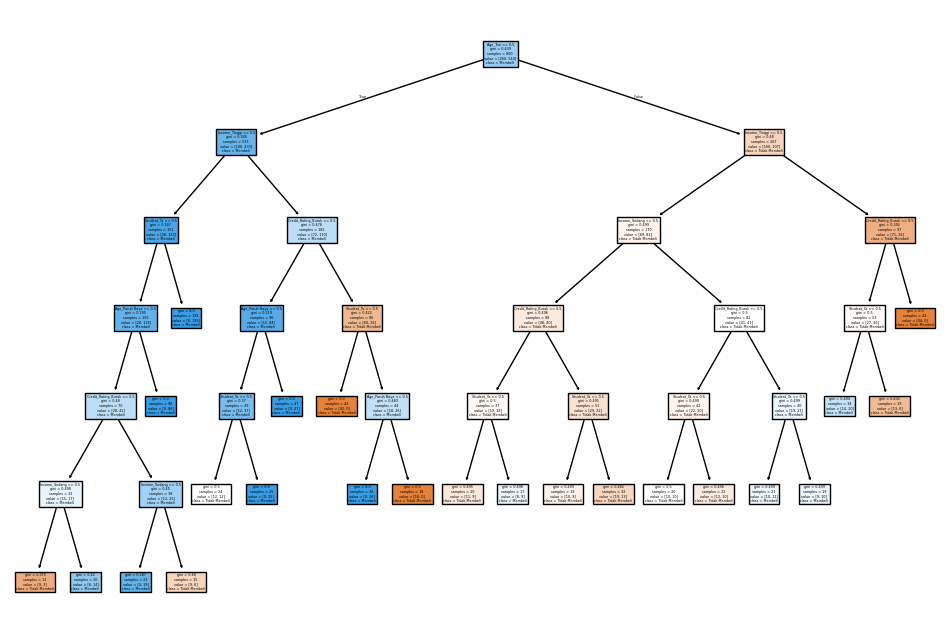

In [86]:
# Menampilkan visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Tidak Membeli', 'Membeli'])
plt.show()


In [87]:
# Menyimpan model
joblib.dump(model, 'decision_tree_model.pkl')



['decision_tree_model.pkl']

In [88]:
# Memuat model yang telah disimpan
model = joblib.load('decision_tree_model.pkl')


Jumlah data latih: 800
Jumlah data uji: 200


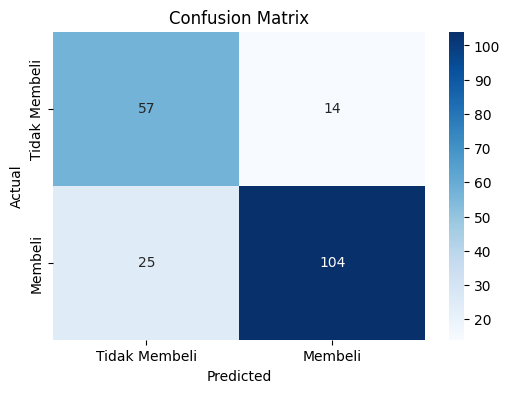

In [89]:
# Memastikan ukuran data latih dan data uji
print(f'Jumlah data latih: {len(X_train)}')
print(f'Jumlah data uji: {len(X_test)}')

# Pastikan prediksi dilakukan untuk seluruh data uji
y_pred = model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Membeli', 'Membeli'], yticklabels=['Tidak Membeli', 'Membeli'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [90]:

y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menghitung precision untuk kelas "Tidak Membeli" (label 0)
precision = precision_score(y_test, y_pred, pos_label=0)
print(f'Presisi untuk kelas "Tidak Membeli": {precision:.2f}')

# Menghitung recall untuk kelas "Tidak Membeli" (label 0)
recall = recall_score(y_test, y_pred, pos_label=0)
print(f'Recall untuk kelas "Tidak Membeli": {recall:.2f}')

# Menghitung F1-Score untuk kelas "Tidak Membeli" (label 0)
f1 = f1_score(y_test, y_pred, pos_label=0)
print(f'F1-Score untuk kelas "Tidak Membeli": {f1:.2f}')

# Menampilkan laporan klasifikasi secara lengkap
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Akurasi: 80.50%
Presisi untuk kelas "Tidak Membeli": 0.70
Recall untuk kelas "Tidak Membeli": 0.80
F1-Score untuk kelas "Tidak Membeli": 0.75
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        71
           1       0.88      0.81      0.84       129

    accuracy                           0.81       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.82      0.81      0.81       200

Confusion Matrix:
[[ 57  14]
 [ 25 104]]


### Kesimpulan Model Klasifikasi

Berdasarkan hasil evaluasi model klasifikasi menggunakan **Decision Tree** pada dataset yang diberikan, berikut adalah kesimpulan yang dapat diambil:

1. **Akurasi**:
   - Akurasi model mencapai **80.50%**. Ini menunjukkan bahwa model berhasil mengklasifikasikan dengan benar sekitar 80% dari seluruh data yang diuji.

2. **Presisi dan Recall untuk Kelas "Tidak Membeli" (label 0)**:
   - **Presisi** untuk kelas "Tidak Membeli" adalah **0.70**. Artinya, dari semua prediksi yang mengatakan "Tidak Membeli", sekitar 70% adalah benar.
   - **Recall** untuk kelas "Tidak Membeli" adalah **0.80**. Ini berarti model berhasil menemukan sekitar 80% dari seluruh data yang benar-benar "Tidak Membeli".
   - **F1-Score** untuk kelas "Tidak Membeli" adalah **0.75**, yang merupakan rata-rata harmonis antara presisi dan recall, menunjukkan keseimbangan yang baik antara keduanya.

3. **Presisi dan Recall untuk Kelas "Membeli" (label 1)**:
   - **Presisi** untuk kelas "Membeli" adalah **0.88**. Artinya, dari semua prediksi yang mengatakan "Membeli", sekitar 88% adalah benar.
   - **Recall** untuk kelas "Membeli" adalah **0.81**. Model berhasil menemukan sekitar 81% dari seluruh data yang benar-benar "Membeli".
   - **F1-Score** untuk kelas "Membeli" adalah **0.84**, menunjukkan bahwa model lebih baik dalam mengidentifikasi kelas "Membeli" dibandingkan dengan kelas "Tidak Membeli".

4. **Confusion Matrix**:
   - **True Positive (TP)** untuk kelas "Membeli": 104
   - **False Positive (FP)** untuk kelas "Membeli": 25
   - **True Negative (TN)** untuk kelas "Tidak Membeli": 57
   - **False Negative (FN)** untuk kelas "Tidak Membeli": 14
   - Hal ini mengindikasikan bahwa model lebih sering salah dalam mengidentifikasi kelas "Tidak Membeli" (14 kali) daripada dalam mengidentifikasi kelas "Membeli" (25 kali). Meskipun demikian, model masih lebih efektif dalam mengidentifikasi "Membeli" daripada "Tidak Membeli".

5. **Macro Average**:
   - **Precision**: 0.79
   - **Recall**: 0.80
   - **F1-Score**: 0.79
   - Rata-rata makro menunjukkan bahwa model memiliki kinerja yang relatif seimbang di antara kedua kelas.

6. **Weighted Average**:
   - **Precision**: 0.82
   - **Recall**: 0.81
   - **F1-Score**: 0.81
   - Rata-rata berbobot menunjukkan bahwa model lebih kuat dalam mengidentifikasi kelas "Membeli" yang lebih dominan dalam dataset ini.


